<a href="https://colab.research.google.com/github/syachmhrd/EDA/blob/main/Tugas_1_Datmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DATA DARI KAGGLE

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [2]:
# install kaggle API
!pip install kaggle

In [3]:
# create a directory as kaggle
! mkdir -p ~/.kaggle

In [4]:
!gdown --id 1cyftAjfB3U6CfWfSOSeRD-vA9VD6D-kV

Downloading...
From: https://drive.google.com/uc?id=1cyftAjfB3U6CfWfSOSeRD-vA9VD6D-kV
To: /content/kaggle.json
100% 66.0/66.0 [00:00<00:00, 120kB/s]


In [5]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle

In [6]:
# disable the API key
! chmod 600 /root/.kaggle/kaggle.json

In [7]:
# list of datasets
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-10 17:55:57          13539  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8127  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3612  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Women                               838MB  2021-02-28 14:56:00           1551  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [8]:
# import the datasets
! kaggle competitions download -c ashrae-energy-prediction

  0% 0.00/2.53M [00:00<?, ?B/s]
100% 2.53M/2.53M [00:00<00:00, 83.6MB/s]
 93% 155M/167M [00:02<00:00, 62.9MB/s]
100% 167M/167M [00:02<00:00, 69.2MB/s]
  0% 0.00/44.5k [00:00<?, ?B/s]
100% 44.5k/44.5k [00:00<00:00, 67.5MB/s]
 93% 82.0M/88.4M [00:01<00:00, 45.6MB/s]
100% 88.4M/88.4M [00:01<00:00, 55.5MB/s]
  0% 0.00/1.27M [00:00<?, ?B/s]
100% 1.27M/1.27M [00:00<00:00, 85.6MB/s]
 95% 114M/120M [00:02<00:00, 41.3MB/s]
100% 120M/120M [00:02<00:00, 50.8MB/s]


In [9]:
# unzipping dataset
! unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [10]:
# unzipping dataset
! unzip /content/weather_train.csv.zip

Archive:  /content/weather_train.csv.zip
  inflating: weather_train.csv       


# Preprocessing

##Data Gedung#

In [11]:
data_gedung = pd.read_csv('/content/building_metadata.csv')

In [12]:
data_gedung.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [13]:
data_gedung.tail()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN
1448,15,1448,Office,92271,2001.0,NaN


In [14]:
data_gedung.sample(5)

,site_id,building_id,primary_use,square_feet,year_built,floor_count
1146,13,1146,Public services,83155,NaN,NaN
1151,13,1151,Office,267536,NaN,NaN
154,1,154,Office,34455,1907.0,8.0
175,2,175,Education,111635,1989.0,NaN
308,3,308,Public services,5033,NaN,NaN


In [15]:
#Menghitung jumlah missing value di setiap kolom
print(data_gedung)
print(data_gedung.isnull().sum())
print(data_gedung.isnull().sum().sum())

      site_id  building_id  ... year_built  floor_count
0           0            0  ...     2008.0          NaN
1           0            1  ...     2004.0          NaN
2           0            2  ...     1991.0          NaN
3           0            3  ...     2002.0          NaN
4           0            4  ...     1975.0          NaN
...       ...          ...  ...        ...          ...
1444       15         1444  ...     1914.0          NaN
1445       15         1445  ...        NaN          NaN
1446       15         1446  ...     1997.0          NaN
1447       15         1447  ...     2001.0          NaN
1448       15         1448  ...     2001.0          NaN

[1449 rows x 6 columns]
site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64
1868


In [16]:
#menghapus data year_built dan floor_count karena missing value lebih dari 50%
data_gedung.drop("year_built", axis=1, inplace=True)
data_gedung.drop("floor_count", axis=1, inplace=True)
data_gedung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   site_id      1449 non-null   int64 
 1   building_id  1449 non-null   int64 
 2   primary_use  1449 non-null   object
 3   square_feet  1449 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.4+ KB


In [17]:
print(data_gedung.shape)
data_gedung.duplicated().sum()

(1449, 4)


0

##Data Energy#

In [18]:
data_energy = pd.read_csv('/content/train.csv')

In [19]:
data_energy.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [20]:
data_energy.tail()

,building_id,meter,timestamp,meter_reading
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575
20216099,1448,0,2016-12-31 23:00:00,2.850


In [21]:
data_energy.sample(5)

,building_id,meter,timestamp,meter_reading
18713542,1274,0,2016-12-05 08:00:00,31.0000
2698464,1024,0,2016-02-19 20:00:00,14.5201
5358541,460,0,2016-04-11 07:00:00,17.6700
13830875,1104,2,2016-09-09 08:00:00,8244.1400
11007240,117,0,2016-07-20 17:00:00,108.5000


In [22]:
#Menghitung jumlah missing value di setiap kolom
print(data_energy)
print(data_energy.isnull().sum())
print(data_energy.isnull().sum().sum())

          building_id  meter            timestamp  meter_reading
0                   0      0  2016-01-01 00:00:00          0.000
1                   1      0  2016-01-01 00:00:00          0.000
2                   2      0  2016-01-01 00:00:00          0.000
3                   3      0  2016-01-01 00:00:00          0.000
4                   4      0  2016-01-01 00:00:00          0.000
...               ...    ...                  ...            ...
20216095         1444      0  2016-12-31 23:00:00          8.750
20216096         1445      0  2016-12-31 23:00:00          4.825
20216097         1446      0  2016-12-31 23:00:00          0.000
20216098         1447      0  2016-12-31 23:00:00        159.575
20216099         1448      0  2016-12-31 23:00:00          2.850

[20216100 rows x 4 columns]
building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64
0


In [23]:
data_energy.shape

(20216100, 4)

In [24]:
data_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [25]:
data_energy['timestamp']= pd.to_datetime(data_energy['timestamp'])
data_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   building_id    int64         
 1   meter          int64         
 2   timestamp      datetime64[ns]
 3   meter_reading  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 616.9 MB


In [26]:
# coba coba
target_train_df = data_energy.merge(data_gedung, left_on='building_id',right_on='building_id',how='left')

##Data Cuaca#

In [27]:
data_cuaca = pd.read_csv('/content/weather_train.csv')

In [28]:
data_cuaca.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [29]:
data_cuaca.tail()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6
139772,15,2016-12-31 23:00:00,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


In [30]:
data_cuaca.sample(5)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
56564,6,2016-06-12 05:00:00,26.1,0.0,15.0,0.0,1012.9,170.0,1.5
63689,7,2016-04-09 07:00:00,-5.8,NaN,-10.8,NaN,1009.5,330.0,3.1
72190,8,2016-03-30 10:00:00,17.8,NaN,16.1,0.0,1018.9,360.0,2.6
39168,4,2016-06-18 03:00:00,16.7,NaN,12.2,0.0,1018.2,260.0,5.1
73269,8,2016-05-14 09:00:00,21.7,0.0,20.0,0.0,1014.5,260.0,1.5


In [31]:
#Menghitung jumlah missing value di setiap kolom
print(data_cuaca)
print(data_cuaca.isnull().sum())
print(data_cuaca.isnull().sum().sum())

        site_id            timestamp  ...  wind_direction  wind_speed
0             0  2016-01-01 00:00:00  ...             0.0         0.0
1             0  2016-01-01 01:00:00  ...            70.0         1.5
2             0  2016-01-01 02:00:00  ...             0.0         0.0
3             0  2016-01-01 03:00:00  ...             0.0         0.0
4             0  2016-01-01 04:00:00  ...           250.0         2.6
...         ...                  ...  ...             ...         ...
139768       15  2016-12-31 19:00:00  ...           180.0         5.7
139769       15  2016-12-31 20:00:00  ...           180.0         7.7
139770       15  2016-12-31 21:00:00  ...           180.0         5.1
139771       15  2016-12-31 22:00:00  ...           170.0         4.6
139772       15  2016-12-31 23:00:00  ...           180.0         8.8

[139773 rows x 9 columns]
site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature      

In [32]:
data_cuaca.shape

(139773, 9)

In [33]:
#hapus cloud coverage karena MV nyaris 50%
data_cuaca.drop("cloud_coverage", axis=1, inplace=True)

In [34]:
data_cuaca.groupby('site_id').mean()

,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
site_id,,,,,,
0,22.836021,16.817880,1.382557,1017.988378,156.494024,3.375114
1,11.711801,7.646473,NaN,1015.989795,195.584475,3.967043
2,24.940321,4.069506,0.157738,1011.679311,152.777100,2.932764
3,15.520579,8.126214,0.691868,1017.938692,185.063174,3.910893
4,15.236366,9.894750,0.248594,1016.887750,207.864715,3.858226
5,10.867931,8.194676,NaN,NaN,200.053191,4.768087
6,15.141678,7.320691,0.797768,1017.527954,131.618143,2.197758
7,7.888867,1.905913,11.350205,1015.252010,208.931739,3.445565
8,22.836021,16.817880,1.382557,1017.988378,156.494024,3.375114


In [35]:
data_cuaca.dtypes

site_id                 int64
timestamp              object
air_temperature       float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

In [36]:
data_cuaca.info()
#dapat dilihat timestamp masih berupa string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   dew_temperature     139660 non-null  float64
 4   precip_depth_1_hr   89484 non-null   float64
 5   sea_level_pressure  129155 non-null  float64
 6   wind_direction      133505 non-null  float64
 7   wind_speed          139469 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.5+ MB


In [37]:
#Data timestamp diubah menjadi tipe 
data_cuaca['timestamp']= pd.to_datetime(data_cuaca['timestamp'])
data_cuaca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   site_id             139773 non-null  int64         
 1   timestamp           139773 non-null  datetime64[ns]
 2   air_temperature     139718 non-null  float64       
 3   dew_temperature     139660 non-null  float64       
 4   precip_depth_1_hr   89484 non-null   float64       
 5   sea_level_pressure  129155 non-null  float64       
 6   wind_direction      133505 non-null  float64       
 7   wind_speed          139469 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 8.5 MB


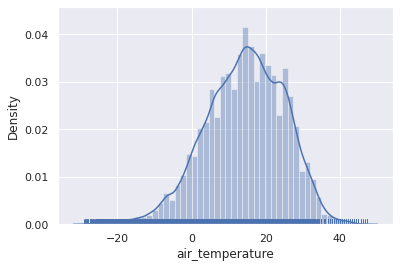

In [38]:
p = sns.distplot(data_cuaca['air_temperature'], kde=True, rug=True)
#ditemukan bahwa distribusi dapat dikatakan normal/? apa menceng si

count    139718.000000
mean         14.418106
std          10.626595
min         -28.900000
25%           7.200000
50%          15.000000
75%          22.200000
max          47.200000
Name: air_temperature, dtype: float64


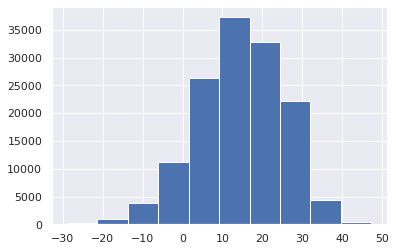

In [39]:
# Melihat data untuk air temperature
print(data_cuaca['air_temperature'].describe())
data_cuaca['air_temperature'].hist()

In [40]:
# # Memasukan missing data air temperature berdasarkan median
data_cuaca['air_temperature'] = data_cuaca['air_temperature'].replace(np.nan, 15)

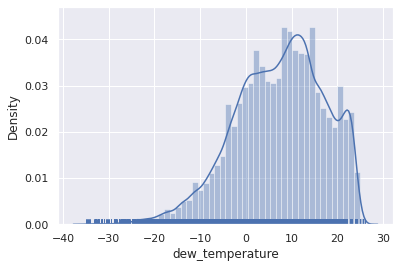

In [41]:
p = sns.distplot(data_cuaca['dew_temperature'], kde=True, rug=True)
#ditemukan bahwa data menceng kanan sehingga missing values diganti dengan median

count    89484.000000
mean         0.983047
std          8.463678
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        343.000000
Name: precip_depth_1_hr, dtype: float64


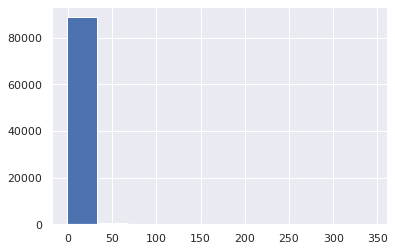

In [42]:
# Melihat data untuk precip depth
print(data_cuaca['precip_depth_1_hr'].describe())
data_cuaca['precip_depth_1_hr'].hist()

In [43]:
data_cuaca["hours"] = data_cuaca["timestamp"].dt.hour
data_cuaca.groupby(["hours"]).mean()

,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
hours,,,,,,,
0,7.487905,15.777526,7.103690,1.206971,1015.566358,191.099893,3.775352
1,7.482723,14.985989,7.204729,1.549368,1015.777885,184.840865,3.529468
2,7.484313,14.246528,7.249811,0.931183,1015.970562,179.961538,3.379722
3,7.476215,13.630706,7.312818,0.880882,1016.131645,177.488104,3.191231
4,7.467928,13.143577,7.382527,0.902991,1016.188532,176.859996,3.105524
5,7.461975,12.712285,7.373145,0.661634,1016.220893,175.702741,3.021792
6,7.454405,12.373056,7.364871,0.885768,1016.136711,174.530150,3.005597
7,7.456001,12.161236,7.394690,0.810377,1016.080880,173.282766,2.984997
8,7.467423,11.950507,7.350654,0.723490,1015.990906,171.604873,3.005113


In [44]:
dasuho0= data_cuaca[data_cuaca["hours"]==0]
dasuho1= data_cuaca[data_cuaca["hours"]==1]
dasuho2= data_cuaca[data_cuaca["hours"]==2]
dasuho3= data_cuaca[data_cuaca["hours"]==3]
dasuho4= data_cuaca[data_cuaca["hours"]==4]
dasuho5= data_cuaca[data_cuaca["hours"]==5]
dasuho6= data_cuaca[data_cuaca["hours"]==6]
dasuho7= data_cuaca[data_cuaca["hours"]==7]
dasuho8= data_cuaca[data_cuaca["hours"]==8]
dasuho9= data_cuaca[data_cuaca["hours"]==9]
dasuho10= data_cuaca[data_cuaca["hours"]==10]
dasuho11= data_cuaca[data_cuaca["hours"]==11]
dasuho12= data_cuaca[data_cuaca["hours"]==12]
dasuho13= data_cuaca[data_cuaca["hours"]==13]
dasuho14= data_cuaca[data_cuaca["hours"]==14]
dasuho15= data_cuaca[data_cuaca["hours"]==15]
dasuho16= data_cuaca[data_cuaca["hours"]==16]
dasuho17= data_cuaca[data_cuaca["hours"]==17]
dasuho18= data_cuaca[data_cuaca["hours"]==18]
dasuho19= data_cuaca[data_cuaca["hours"]==19]
dasuho20= data_cuaca[data_cuaca["hours"]==20]
dasuho21= data_cuaca[data_cuaca["hours"]==21]
dasuho22= data_cuaca[data_cuaca["hours"]==22]
dasuho23= data_cuaca[data_cuaca["hours"]==23]

In [45]:
dasuho0['precip_depth_1_hr']= dasuho0.replace(np.nan,1.2)
dasuho1['precip_depth_1_hr']= dasuho1.replace(np.nan,1.5)
dasuho2['precip_depth_1_hr']= dasuho2.replace(np.nan,0.9)
dasuho3['precip_depth_1_hr']= dasuho3.replace(np.nan,0.9)
dasuho4['precip_depth_1_hr']= dasuho4.replace(np.nan,0.9)
dasuho5['precip_depth_1_hr']= dasuho5.replace(np.nan,0.7)
dasuho6['precip_depth_1_hr']= dasuho6.replace(np.nan,0.9)
dasuho7['precip_depth_1_hr']= dasuho7.replace(np.nan,0.8)
dasuho8['precip_depth_1_hr']= dasuho8.replace(np.nan,0.7)
dasuho9['precip_depth_1_hr']= dasuho9.replace(np.nan,0.7)
dasuho10['precip_depth_1_hr']= dasuho10.replace(np.nan,0.8)
dasuho11['precip_depth_1_hr']= dasuho11.replace(np.nan,0.8)
dasuho12['precip_depth_1_hr']= dasuho12.replace(np.nan,0.8)
dasuho13['precip_depth_1_hr']= dasuho13.replace(np.nan,0.8)
dasuho14['precip_depth_1_hr']= dasuho14.replace(np.nan,0.8)
dasuho15['precip_depth_1_hr']= dasuho15.replace(np.nan,0.9)
dasuho16['precip_depth_1_hr']= dasuho16.replace(np.nan,0.8)
dasuho17['precip_depth_1_hr']= dasuho17.replace(np.nan,0.8)
dasuho18['precip_depth_1_hr']= dasuho18.replace(np.nan,0.8)
dasuho19['precip_depth_1_hr']= dasuho19.replace(np.nan,1.2)
dasuho20['precip_depth_1_hr']= dasuho20.replace(np.nan,1.3)
dasuho21['precip_depth_1_hr']= dasuho21.replace(np.nan,1.3)
dasuho22['precip_depth_1_hr']= dasuho22.replace(np.nan,1.6)
dasuho23['precip_depth_1_hr']= dasuho23.replace(np.nan,1.3)
data_cuaca = pd.concat([dasuho0,dasuho1,dasuho2
                        ,dasuho3,dasuho4,dasuho5
                        ,dasuho6,dasuho7,dasuho8
                        ,dasuho9,dasuho10,dasuho11
                        ,dasuho12,dasuho13,dasuho14
                        ,dasuho15,dasuho16,dasuho17
                        ,dasuho18,dasuho19,dasuho20
                        ,dasuho21,dasuho22,dasuho23])

count    139660.000000
mean          7.350158
std           9.790235
min         -35.000000
25%           0.600000
50%           8.300000
75%          14.400000
max          26.100000
Name: dew_temperature, dtype: float64


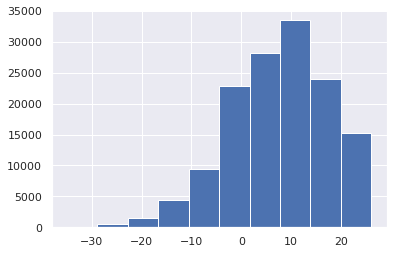

In [46]:
# Melihat data untuk dew temperature
print(data_cuaca['dew_temperature'].describe())
data_cuaca['dew_temperature'].hist()

In [47]:
# # Memasukan missing data dew temperature berdasarkan median
data_cuaca['dew_temperature'] = data_cuaca['dew_temperature'].replace(np.nan, 8.3)

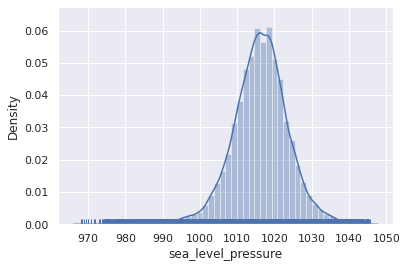

In [48]:
p = sns.distplot(data_cuaca['sea_level_pressure'], kde=True, rug=True)
#Terlihat bahwa kemungkinan data berdistribusi normal, sehingga missing value akan diganti dengan nilai mean

count    129155.000000
mean       1016.158038
std           7.629684
min         968.200000
25%        1011.800000
50%        1016.400000
75%        1020.800000
max        1045.500000
Name: sea_level_pressure, dtype: float64


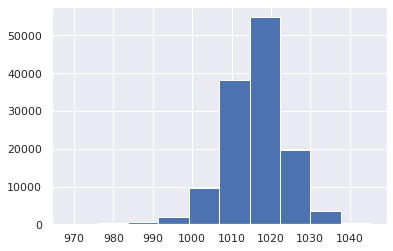

In [49]:
# Melihat data untuk sea_level_pressure
print(data_cuaca['sea_level_pressure'].describe())
data_cuaca['sea_level_pressure'].hist()

In [50]:
# Memasukan missing data sea level pressure berdasarkan mean
data_cuaca['sea_level_pressure'] = data_cuaca['sea_level_pressure'].replace(np.nan, 1016.158038)

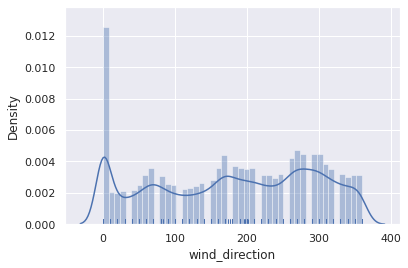

In [51]:
p = sns.distplot(data_cuaca['wind_direction'], kde=True, rug=True)

In [52]:
data_cuaca.groupby('site_id').mean()

,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,hours
site_id,,,,,,
0,22.833345,16.814970,1017.970666,156.494024,3.375114,11.500000
1,11.712176,7.646548,1015.990793,195.584475,3.967043,11.498688
2,24.939189,4.069987,1011.701748,152.777100,2.932764,11.498918
3,15.520342,8.126333,1017.906648,185.063174,3.910893,11.503531
4,15.236366,9.894387,1016.881685,207.864715,3.858226,11.501309
5,10.868875,8.194700,1016.158038,200.053191,4.768087,11.499829
6,15.141517,7.321806,1017.500656,131.618143,2.197758,11.501025
7,7.888867,1.922986,1015.252852,208.931739,3.445565,11.482238
8,22.833345,16.814970,1017.970666,156.494024,3.375114,11.500000


In [53]:
#

In [54]:
#mengisi missing value wind direction berdasarkan mean per site
dasusite0= data_cuaca[data_cuaca["site_id"]==0]
dasusite1= data_cuaca[data_cuaca["site_id"]==1]
dasusite2= data_cuaca[data_cuaca["site_id"]==2]
dasusite3= data_cuaca[data_cuaca["site_id"]==3]
dasusite4= data_cuaca[data_cuaca["site_id"]==4]
dasusite5= data_cuaca[data_cuaca["site_id"]==5]
dasusite6= data_cuaca[data_cuaca["site_id"]==6]
dasusite7= data_cuaca[data_cuaca["site_id"]==7]
dasusite8= data_cuaca[data_cuaca["site_id"]==8]
dasusite9= data_cuaca[data_cuaca["site_id"]==9]
dasusite10= data_cuaca[data_cuaca["site_id"]==10]
dasusite11= data_cuaca[data_cuaca["site_id"]==11]
dasusite12= data_cuaca[data_cuaca["site_id"]==12]
dasusite13= data_cuaca[data_cuaca["site_id"]==13]
dasusite14= data_cuaca[data_cuaca["site_id"]==14]
dasusite15= data_cuaca[data_cuaca["site_id"]==15]

In [55]:
dasusite0['wind_direction']= dasusite0.replace(np.nan,156.0)
dasusite1['wind_direction']= dasusite1.replace(np.nan,196.0)
dasusite2['wind_direction']= dasusite2.replace(np.nan,153.0)
dasusite3['wind_direction']= dasusite3.replace(np.nan,185.0)
dasusite4['wind_direction']= dasusite4.replace(np.nan,208.0)
dasusite5['wind_direction']= dasusite5.replace(np.nan,200.0)
dasusite6['wind_direction']= dasusite6.replace(np.nan,132.0)
dasusite7['wind_direction']= dasusite7.replace(np.nan,209.0)
dasusite8['wind_direction']= dasusite8.replace(np.nan,156.0)
dasusite9['wind_direction']= dasusite9.replace(np.nan,117.0)
dasusite10['wind_direction']= dasusite10.replace(np.nan,180.0)
dasusite11['wind_direction']= dasusite11.replace(np.nan,209.0)
dasusite12['wind_direction']= dasusite12.replace(np.nan,203.0)
dasusite13['wind_direction']= dasusite13.replace(np.nan,188.0)
dasusite14['wind_direction']= dasusite14.replace(np.nan,188.0)
dasusite15['wind_direction']= dasusite15.replace(np.nan,187.0)
data_cuaca = pd.concat([dasusite0,dasusite1,dasusite2
                        ,dasusite3,dasusite4,dasusite5
                        ,dasusite6,dasusite7,dasusite8
                        ,dasusite9,dasusite10,dasusite11
                        ,dasusite12,dasusite13,dasusite14
                        ,dasusite15])

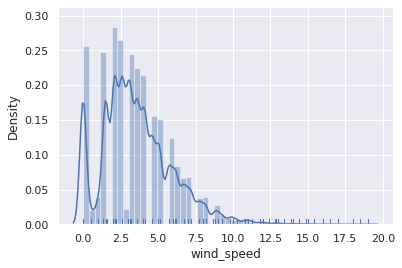

In [56]:
p = sns.distplot(data_cuaca['wind_speed'], kde=True, rug=True)
#data menceng sehingga input mv pakai mean

count    139469.000000
mean          3.560527
std           2.335874
min           0.000000
25%           2.100000
50%           3.100000
75%           5.000000
max          19.000000
Name: wind_speed, dtype: float64


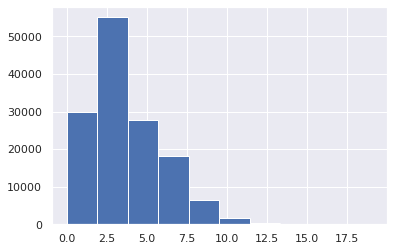

In [57]:
# Melihat data untuk wind speed
print(data_cuaca['wind_speed'].describe())
data_cuaca['wind_speed'].hist()

In [58]:
# # Memasukan missing data sea level pressure berdasarkan median
data_cuaca['wind_speed'] = data_cuaca['wind_speed'].replace(np.nan, 3.1)

In [59]:
data_cuaca.isnull().sum()

site_id               0
timestamp             0
air_temperature       0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
hours                 0
dtype: int64

#**VISUALISASI** DATA GEDUNG# 


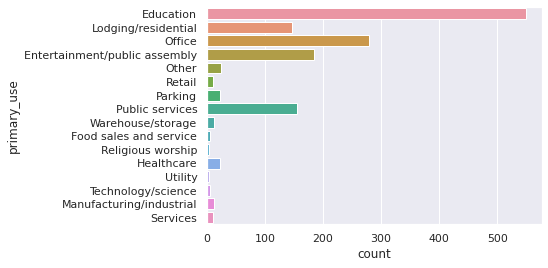

In [60]:
#Gedung paling banyak digunakan untuk apa?
p = sns.countplot(y="primary_use", data=data_gedung)
# ans: education

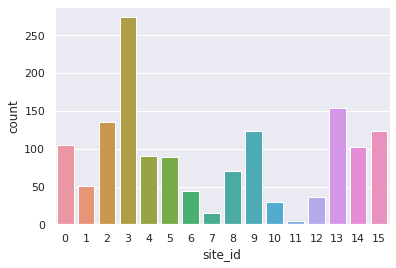

In [61]:
# Paling banyak lokasi dimana
p = sns.countplot(x="site_id", data=data_gedung)
# ans: site 3

In [62]:
data_gedung.groupby(["primary_use", "site_id"]).size().unstack()

site_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
primary_use,,,,,,,,,,,,,,,,
Education,30.0,22.0,61.0,92.0,66.0,49.0,15.0,15.0,NaN,63.0,14.0,5.0,20.0,25.0,26.0,46.0
Entertainment/public assembly,5.0,1.0,21.0,44.0,9.0,18.0,4.0,NaN,24.0,18.0,4.0,NaN,2.0,8.0,10.0,16.0
Food sales and service,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN
Healthcare,NaN,NaN,1.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,1.0
Lodging/residential,27.0,10.0,12.0,11.0,4.0,1.0,12.0,NaN,NaN,19.0,3.0,NaN,NaN,10.0,9.0,29.0
Manufacturing/industrial,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,3.0
Office,24.0,16.0,24.0,23.0,NaN,11.0,11.0,NaN,7.0,17.0,5.0,NaN,9.0,75.0,38.0,19.0
Other,5.0,NaN,NaN,4.0,NaN,1.0,NaN,NaN,9.0,NaN,3.0,NaN,NaN,3.0,NaN,NaN
Parking,8.0,NaN,3.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


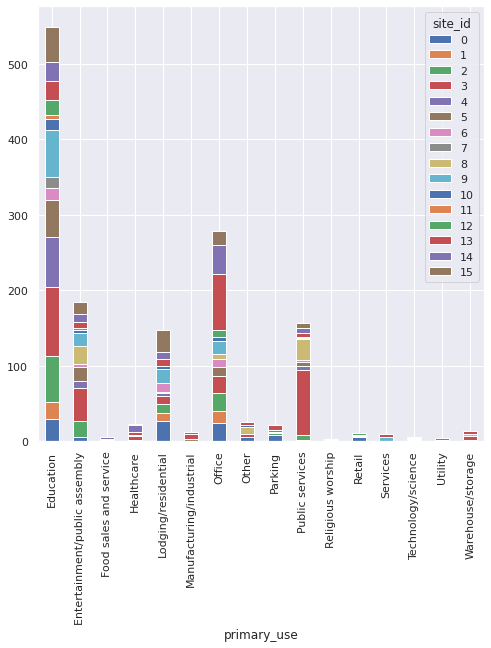

In [63]:
CT = pd.crosstab(index=data_gedung["primary_use"], columns=data_gedung["site_id"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

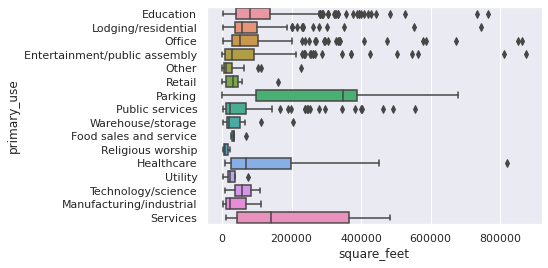

In [64]:
p = sns.boxplot(x="square_feet", y="primary_use", data=data_gedung)
#!!!!!!!!!!!!!menunjukkan luas bangunan tidak mempengaruhi kegunaan gedung karena !!!!!!!!!!!!

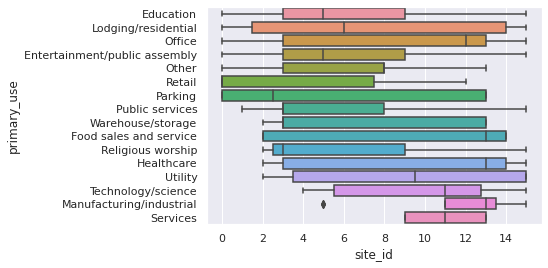

In [65]:
p = sns.boxplot(x="site_id", y="primary_use", data=data_gedung)
#hanya ada sedikit gedung manufacturing yang ada di site 5

# **VISUALISASI** DATA ENERGY

# **VISUALISASI** DATA CUACA

[Text(0, 0.5, 'Air Temperature'), Text(0.5, 0, 'Time')]

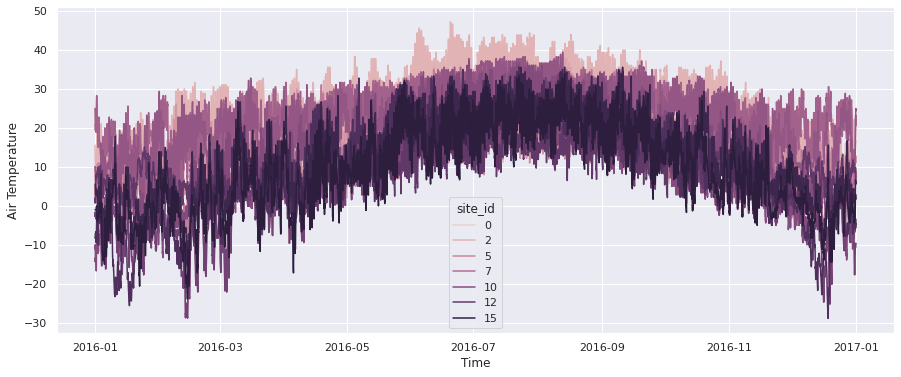

In [66]:
#perubahan air temperature tiap site tiap waktu (?)
plt.figure(figsize=(15, 6))
p = sns.lineplot(x='timestamp', y='air_temperature', hue='site_id', data=data_cuaca)
p.set(xlabel='Time', ylabel='Air Temperature')
#masih coba"
#ini bingung knapa site_id ny ga 0,1,2,3 gt

#MERGE DATA#

In [67]:
def merge(data_energy, data_gedung, data_cuaca):
  data_energy["timestamp"] = pd.to_datetime(data_energy["timestamp"])
  gedung_energy = pd.merge(data_energy, data_gedung, how = "left", on="building_id")
  train = pd.merge(gedung_energy, data_cuaca, how= "left", on=["site_id", "timestamp"], validate="many_to_one")
  del data_gedung
  del data_energy
  del data_cuaca
  return train

In [68]:
all_data = merge(data_energy, data_gedung, data_cuaca)
all_data.shape

(20216100, 14)

In [69]:
all_data.head()
all_data.drop("hours", axis=1, inplace=True)

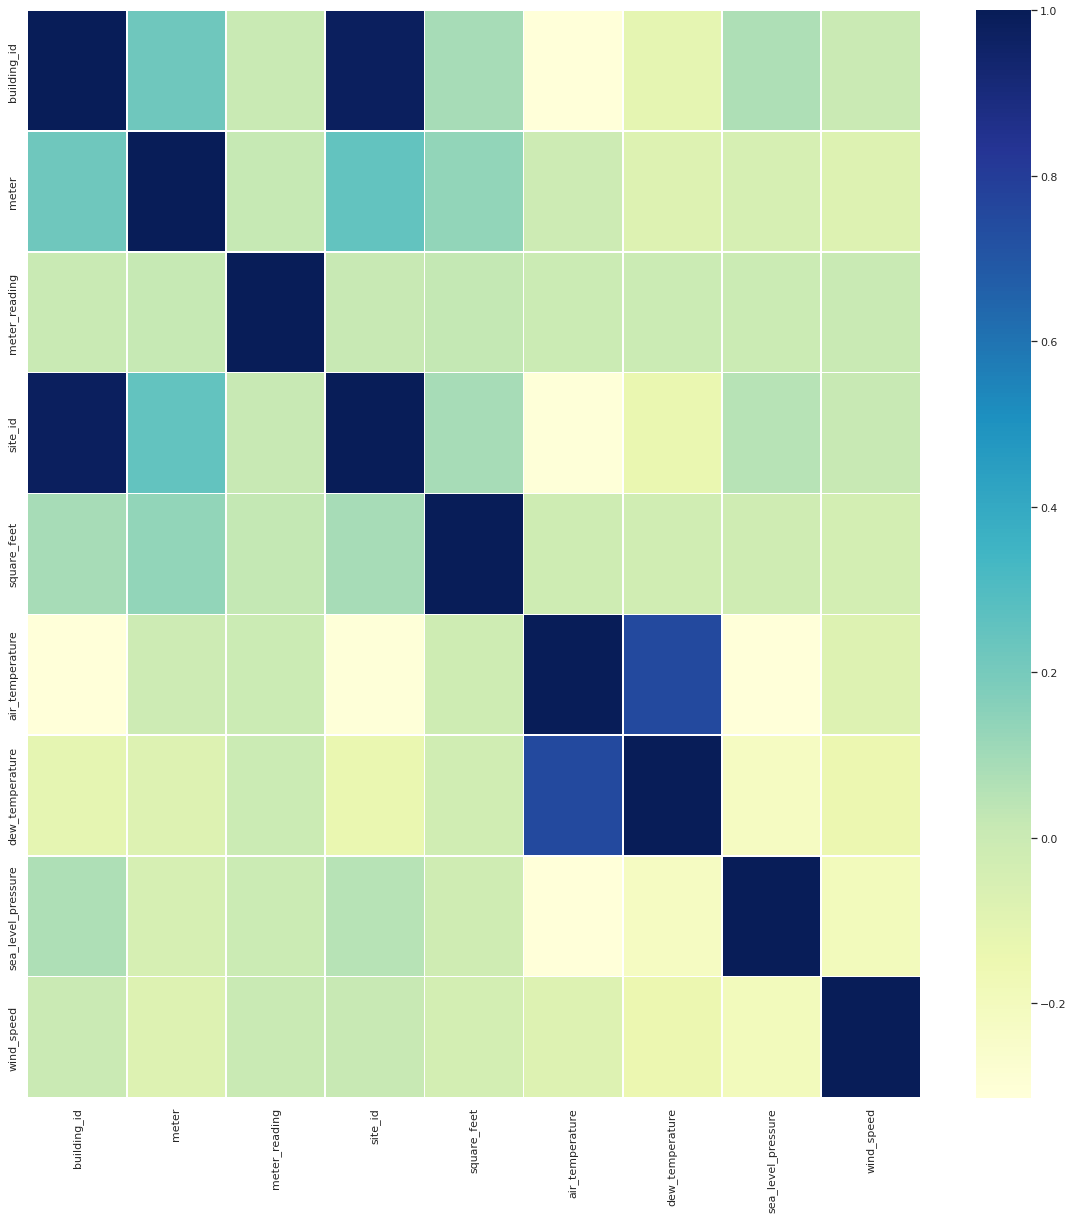

In [70]:
plt.figure(figsize=(20,20))
sns.heatmap(all_data.corr(), linewidths = 0.5, cmap = "YlGnBu")

In [71]:
all_data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0,Education,7432,25.0,20.0,0,1019.7,0,0.0
1,1,0,2016-01-01,0.0,0,Education,2720,25.0,20.0,0,1019.7,0,0.0
2,2,0,2016-01-01,0.0,0,Education,5376,25.0,20.0,0,1019.7,0,0.0
3,3,0,2016-01-01,0.0,0,Education,23685,25.0,20.0,0,1019.7,0,0.0
4,4,0,2016-01-01,0.0,0,Education,116607,25.0,20.0,0,1019.7,0,0.0


In [72]:
print(all_data)

          building_id  meter  ... wind_direction  wind_speed
0                   0      0  ...              0         0.0
1                   1      0  ...              0         0.0
2                   2      0  ...              0         0.0
3                   3      0  ...              0         0.0
4                   4      0  ...              0         0.0
...               ...    ...  ...            ...         ...
20216095         1444      0  ...             15         8.8
20216096         1445      0  ...             15         8.8
20216097         1446      0  ...             15         8.8
20216098         1447      0  ...             15         8.8
20216099         1448      0  ...             15         8.8

[20216100 rows x 13 columns]


In [73]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   building_id         int64         
 1   meter               int64         
 2   timestamp           datetime64[ns]
 3   meter_reading       float64       
 4   site_id             int64         
 5   primary_use         object        
 6   square_feet         int64         
 7   air_temperature     float64       
 8   dew_temperature     float64       
 9   precip_depth_1_hr   object        
 10  sea_level_pressure  float64       
 11  wind_direction      object        
 12  wind_speed          float64       
dtypes: datetime64[ns](1), float64(5), int64(4), object(3)
memory usage: 2.1+ GB


In [74]:
totmeterperbuild= all_data[["building_id", "meter_reading"]].groupby("building_id").sum()
totmeterperbuild = all_data.merge(totmeterperbuild, on="building_id")
totmeterperbuild.head()

,building_id,meter,timestamp,meter_reading_x,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,meter_reading_y
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,25.0,20.0,0,1019.7,0,0.0,1.286461e+06
1,0,0,2016-01-01 01:00:00,0.0,0,Education,7432,24.4,21.1,0,1020.2,0,1.5,1.286461e+06
2,0,0,2016-01-01 02:00:00,0.0,0,Education,7432,22.8,21.1,0,1020.2,0,0.0,1.286461e+06
3,0,0,2016-01-01 03:00:00,0.0,0,Education,7432,21.1,20.6,0,1020.1,0,0.0,1.286461e+06
4,0,0,2016-01-01 04:00:00,0.0,0,Education,7432,20.0,20.0,0,1020.0,0,2.6,1.286461e+06


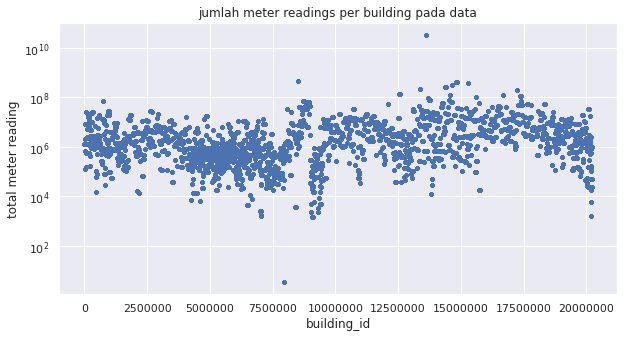

In [75]:
# Make the plot untuk cek outliers
plt.ticklabel_format(style = 'plain')
totmeterperbuild.meter_reading_y.plot(logy=True, style='.', 
                                         title= "jumlah meter readings per building pada data", 
                                         xlabel = 'building_id',
                                         ylabel= 'total meter reading',
                                         figsize = (10,5)
                                          )
plt.show()